<a href="https://colab.research.google.com/github/OgiHR/python/blob/main/LDA_TIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the dataset
df = pd.read_csv('/content/drive/MyDrive/IPB/Dataset/Dataset-2021.csv')

print('Shape of the dataframe:', df.shape, '\n\nColumns of dataframe:', df.columns)

print('\nHead of the dataframe:\n')
df.head()

Shape of the dataframe: (18, 5) 

Columns of dataframe: Index(['Judul ', 'Tahun', 'Nama Penulis ', 'Abstrak', 'Keywords'], dtype='object')

Head of the dataframe:



,Judul,Tahun,Nama Penulis,Abstrak,Keywords
0,PENENTUAN HARGA OPSI EXCHANGE DENGAN\nMENGGUNA...,2021,ISNA NUR FAJRIAH,Exchange option is an option to exchange one a...,"Black-Scholes model, exchange option, option p..."
1,ANALISIS VOLATILITAS HARGA BERAS DAN FAKTOR\nY...,2021,SOPI YATUN HASANAH,Indonesia is one of the countries that is the ...,"ARCH-GARCH, Indonesian Rice Prices, VECM, Vola..."
2,PENGARUH VARIABEL MAKROEKONOMI DAN PANDEMI\nCO...,2021,ELISA YEMIMA SIANTURI,This study aims to determine the effect of mac...,"agribusiness, stock prices, macroeconomic vari..."
3,DAMPAK EL NINO DAN LA NINA TERHADAP HARGA\nKUB...,2021,RIZQI FITRIANA,Climate change is a popular issue discussed in...,"cabbage prices, El Nino, La Nina, static panels"
4,PENENTUAN HARGA OPSI EROPA MENGGUNAKAN\nMETODE...,2021,ALOYSIUS MAVERICK SARIUN,European option prices are generally calculate...,"European option, finite difference method, Mon..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Judul          18 non-null     object
 1   Tahun          18 non-null     int64 
 2   Nama Penulis   17 non-null     object
 3   Abstrak        18 non-null     object
 4   Keywords       18 non-null     object
dtypes: int64(1), object(4)
memory usage: 848.0+ bytes


In [ ]:
text_len = df.Abstrak.apply(lambda x: len(x))

print('\nMinimum length of the text:', text_len.min())
print('\nMaximum length of the text:', text_len.max())
print('\nMean length of the text:', int(text_len.mean()))


Minimum length of the text: 832

Maximum length of the text: 1753

Mean length of the text: 1143


In [ ]:
import copy

df_new = copy.deepcopy(df)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# creating an instance
cv = CountVectorizer(max_df = 0.90, min_df = 2, stop_words = 'english')

# fit and transform the text data
cv_fit = cv.fit_transform(df_new.Abstrak)

print('\nShape of the sparse matrix\n')
cv_fit


Shape of the sparse matrix



<18x187 sparse matrix of type '<class 'numpy.int64'>'
	with 629 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# creating an instance for LDA
lda = LatentDirichletAllocation(n_components = 5, random_state = 1)

In [ ]:
print('Fitting the vectorzer with the LDA')

lda.fit(cv_fit)

Fitting the vectorzer with the LDA


LatentDirichletAllocation(n_components=5, random_state=1)

In [ ]:
print('Number of topics:', len(lda.components_))
print('Number of columns of the lda fit:', len(lda.components_[0]))

Number of topics: 5
Number of columns of the lda fit: 187


In [ ]:
feature = cv.get_feature_names()

print('Length of feature names:', len(feature))

Length of feature names: 187


In [ ]:
for ind, topic in enumerate(lda.components_):
    print('Top 15 words in topic {}'.format(ind))
    print('-'*25)
    top_15 = topic.argsort()[-15:]
    print([feature[i] for i in top_15], '\n\n')

Top 15 words in topic 0
-------------------------
['world', 'production', 'impact', 'study', 'food', 'oil', 'data', 'aspects', 'results', 'used', 'pandemic', 'covid', '19', 'activities', 'prices'] 


Top 15 words in topic 1
-------------------------
['prices', 'indonesian', 'second', 'world', 'exchange', 'indonesia', 'model', 'effect', 'countries', 'policy', 'export', 'option', 'stock', 'rubber', 'natural'] 


Top 15 words in topic 2
-------------------------
['makes', 'increase', 'calculation', 'higher', 'product', 'commodities', 'popular', 'obtained', 'national', 'import', 'continue', 'panel', 'future', 'time', 'producers'] 


Top 15 words in topic 3
-------------------------
['effect', 'indonesia', 'results', 'stock', 'used', 'volatility', 'method', 'changes', 'model', 'indonesian', 'option', 'study', 'corn', 'rice', 'prices'] 


Top 15 words in topic 4
-------------------------
['rise', 'consisting', 'commodity', 'continue', 'prices', 'used', 'arch', 'rate', 'import', 'indonesian',

In [ ]:
len(lda.components_[1])

187

In [ ]:
df_final = lda.transform(cv_fit)

print('Shape of the df_final:', df_final.shape)

Shape of the df_final: (18, 5)


In [ ]:
print('\nChecking the probability distribution of one text data belonging to the topic.\n')

print('Few words from 1st row:', df_new.Abstrak[0][:88], '\n')

print('Probability distribution:', df_final[0])


Checking the probability distribution of one text data belonging to the topic.

Few words from 1st row: Exchange option is an option to exchange one asset for another at maturity.
This option  

Probability distribution: [0.00330189 0.98677663 0.00327981 0.00333644 0.00330523]


In [ ]:
prob = df_final[0][df_final[0].argmax()].round(2)

print('Document belong to the topic', df_final[0].argmax(), 'with the probability of', prob)

Document belong to the topic 1 with the probability of 0.99


In [ ]:
df_new['topic'] = df_final.argmax(axis = 1)

df_new.head()

,Judul,Tahun,Nama Penulis,Abstrak,Keywords,topic
0,PENENTUAN HARGA OPSI EXCHANGE DENGAN\nMENGGUNA...,2021,ISNA NUR FAJRIAH,Exchange option is an option to exchange one a...,"Black-Scholes model, exchange option, option p...",1
1,ANALISIS VOLATILITAS HARGA BERAS DAN FAKTOR\nY...,2021,SOPI YATUN HASANAH,Indonesia is one of the countries that is the ...,"ARCH-GARCH, Indonesian Rice Prices, VECM, Vola...",3
2,PENGARUH VARIABEL MAKROEKONOMI DAN PANDEMI\nCO...,2021,ELISA YEMIMA SIANTURI,This study aims to determine the effect of mac...,"agribusiness, stock prices, macroeconomic vari...",0
3,DAMPAK EL NINO DAN LA NINA TERHADAP HARGA\nKUB...,2021,RIZQI FITRIANA,Climate change is a popular issue discussed in...,"cabbage prices, El Nino, La Nina, static panels",0
4,PENENTUAN HARGA OPSI EROPA MENGGUNAKAN\nMETODE...,2021,ALOYSIUS MAVERICK SARIUN,European option prices are generally calculate...,"European option, finite difference method, Mon...",3


In [ ]:
topic_label = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', }

# mapping the dictionary with the dataframe to get the labels.
df_new['topic_name'] = df_new['topic'].map(topic_label)

# head of the dataframe
df_new.head()

,Judul,Tahun,Nama Penulis,Abstrak,Keywords,topic,topic_name
0,PENENTUAN HARGA OPSI EXCHANGE DENGAN\nMENGGUNA...,2021,ISNA NUR FAJRIAH,Exchange option is an option to exchange one a...,"Black-Scholes model, exchange option, option p...",1,B
1,ANALISIS VOLATILITAS HARGA BERAS DAN FAKTOR\nY...,2021,SOPI YATUN HASANAH,Indonesia is one of the countries that is the ...,"ARCH-GARCH, Indonesian Rice Prices, VECM, Vola...",3,D
2,PENGARUH VARIABEL MAKROEKONOMI DAN PANDEMI\nCO...,2021,ELISA YEMIMA SIANTURI,This study aims to determine the effect of mac...,"agribusiness, stock prices, macroeconomic vari...",0,A
3,DAMPAK EL NINO DAN LA NINA TERHADAP HARGA\nKUB...,2021,RIZQI FITRIANA,Climate change is a popular issue discussed in...,"cabbage prices, El Nino, La Nina, static panels",0,A
4,PENENTUAN HARGA OPSI EROPA MENGGUNAKAN\nMETODE...,2021,ALOYSIUS MAVERICK SARIUN,European option prices are generally calculate...,"European option, finite difference method, Mon...",3,D


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

In [ ]:
def word_cloud(topic):
    # plt.figure(figsize = (8,6))
    topic_words = [feature[i] for i in lda.components_[topic].argsort()[-15:]]
    cloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',
                      width=2500, height=1800).generate(" ".join(topic_words))

    print('\nWorcloud for topic:', topic, '\n')
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()


Worcloud for topic: 0 



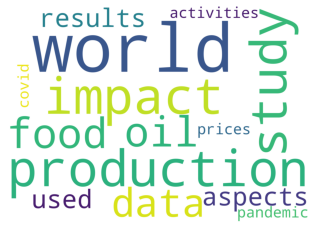


Worcloud for topic: 1 



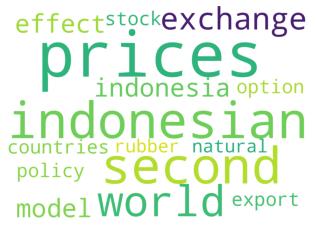


Worcloud for topic: 2 



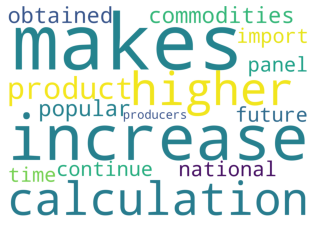


Worcloud for topic: 3 



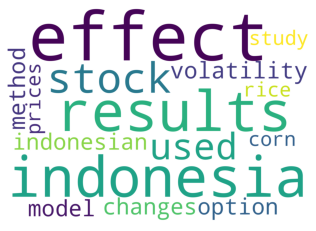


Worcloud for topic: 4 



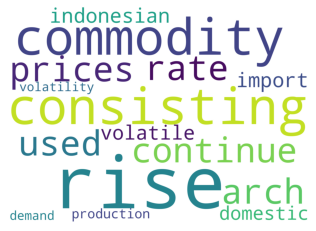

In [ ]:
word_cloud(0)
word_cloud(1)
word_cloud(2)
word_cloud(3)
word_cloud(4)

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=e411373ce32ea1b1816e4e8b4427363a0a7afb393d78662b21184b5b6067fd23
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=359400bddd82152825372fbeb8dae0b3f0f633131c1acb822a159815c74c3076
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


In [ ]:
from sklearn.manifold import TSNE
import pyLDAvis.sklearn

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, tf_fit, tf, mds='tsne')
dash

NameError: ignored